**PART-1**

In [72]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt

In [73]:
class LawnmowerGridEnvironment(gym.Env):
    def __init__(self):
        self.grid_size = (4,4)
        self.state_space = spaces.Discrete(np.prod(self.grid_size))
        self.action_space = spaces.Discrete(4)
        self.positive_reward = 5
        self.negative_reward = -6
        self.goal_reward = 10
        self.starting_state = (0, 0)
        self.current_state = self.starting_state
        self.goal_state = (3, 3)
        self.positive_rewards = [(1, 2), (3, 1)]
        self.negative_rewards = [(1, 3), (2, 2)]

        self.transitions = {
            'Up': (-1, 0),
            'Down': (1, 0),
            'Right': (0, 1),
            'Left': (0, -1)
        }
        self.step_count = 0
        self.max_steps = 10

    def state_to_index(self, state):
        return np.ravel_multi_index(state, self.grid_size)

    def reset(self):
        self.current_state = self.starting_state
        self.step_count = 0
        return self.state_to_index(self.current_state)

    def step(self, action):
        if action not in range(self.action_space.n):
            raise ValueError('Invalid Action')
        transition = self.transitions[list(self.transitions.keys())[action]]
        new_state = tuple(np.add(self.current_state, transition))
        # check if the state is within the grid boundary
        if 0 <=  new_state[0] < self.grid_size[0] and 0 <=  new_state[1] < self.grid_size[1]:
            self.current_state = new_state
        # reward calculation
        if self.current_state == self.goal_state:
            reward = self.goal_reward
        elif self.current_state in self.positive_rewards:
            reward = self.positive_reward
        elif self.current_state in self.negative_rewards:
            reward = self.negative_reward         
        else:
            reward = 0
        self.step_count += 1

        terminated = self.current_state == self.goal_state or self.step_count >= self.max_steps
        info = {}
        return self.current_state, reward, terminated, info
        
    def render(self, show=True):
        grid = np.zeros(self.grid_size)
        grid[self.goal_state] = 0.7
        for pos in self.positive_rewards:
            grid[pos] = 0.5
        for pos in self.negative_rewards:
            grid[pos] = 0.2
        grid[self.current_state] = 0.9
        
        plt.figure(figsize=(3,3))
        plt.imshow(grid, cmap='viridis', origin='upper', interpolation='none', extent=(0, self.grid_size[1], 0, self.grid_size[0]))
        plt.title('Lawnmower Grid World')
        plt.xlabel('Column')
        plt.ylabel('Row')
        plt.colorbar()
        if show:
            plt.show()
        else:
            plt.draw()
            plt.pause(0.1)
            plt.clf()

Initial Environment


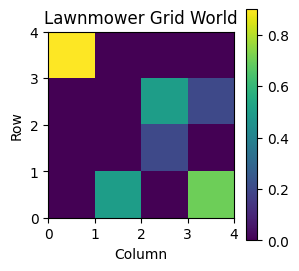

Current state: (0, 1)
Action: Right
Reward: 0
Lawnmower Grid World Environment


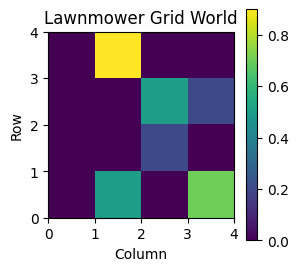

Current state: (1, 1)
Action: Down
Reward: 0
Lawnmower Grid World Environment


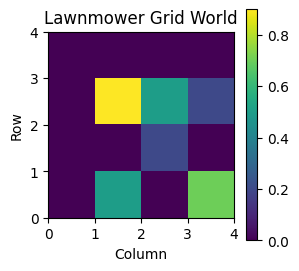

Current state: (1, 0)
Action: Left
Reward: 0
Lawnmower Grid World Environment


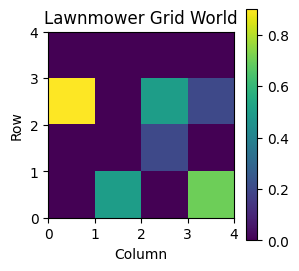

Current state: (2, 0)
Action: Down
Reward: 0
Lawnmower Grid World Environment


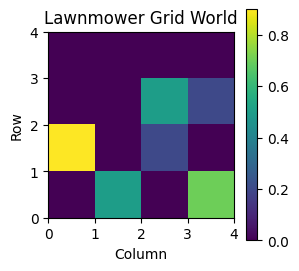

Current state: (1, 0)
Action: Up
Reward: 0
Lawnmower Grid World Environment


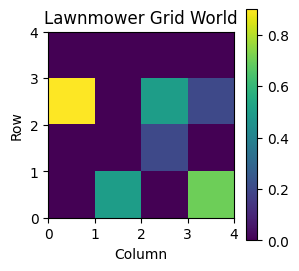

Current state: (1, 0)
Action: Left
Reward: 0
Lawnmower Grid World Environment


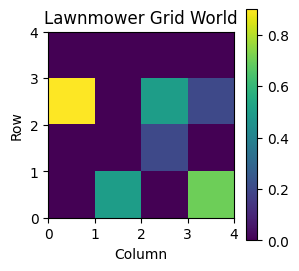

Current state: (1, 0)
Action: Left
Reward: 0
Lawnmower Grid World Environment


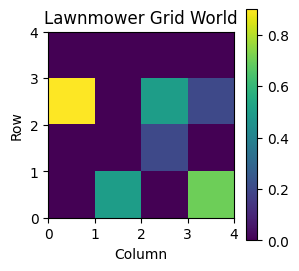

Current state: (2, 0)
Action: Down
Reward: 0
Lawnmower Grid World Environment


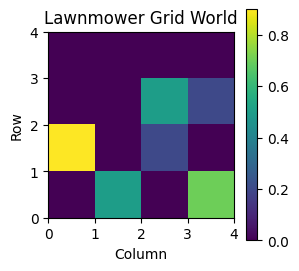

Current state: (2, 0)
Action: Left
Reward: 0
Lawnmower Grid World Environment


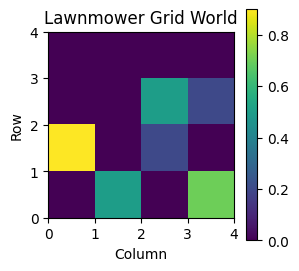

Current state: (3, 0)
Action: Down
Reward: 0
Lawnmower Grid World Environment


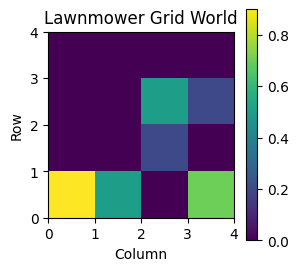

In [74]:
env = LawnmowerGridEnvironment()
state = env.reset()
print('Initial Environment')
env.render()
for i in range(10):
    action = env.action_space.sample()
    next_state, reward, terminated, info = env.step(action)
    print('Current state:', next_state)
    print('Action:', list(env.transitions.keys())[action])
    print('Reward:', reward)
    print('Lawnmower Grid World Environment')
    env.render()
    state = next_state
    if terminated:
        break

**PART-II: SARSA IMPLEMENTATION**

In [75]:
class SarsaAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.env = env
        self.action_space_size = env.action_space.n
        self.state_space_size = env.state_space.n
        self.Q = np.zeros((self.state_space_size, self.action_space_size))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space_size)
        else:
            return np.argmax(self.Q[state, :])
            
    def update_Q_table(self, state, action, reward, next_state, next_action):
        state = int(state)
        next_state = int(next_state)
        target = reward + self.gamma * self.Q[next_state, next_action]
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)

    def train_sarsa(agent, num_episodes):
        total_rewards = []
        epsilon_values = []
        for episode in range(num_episodes):
            if episode == 0:
                print('Initial Q-table:')
                print(agent.Q)
            state = agent.env.reset()
            action = agent.choose_action(state)
            episode_reward = 0
            while True:
                next_state, reward, terminated, info = agent.env.step(action)
                next_state = env.state_to_index(next_state)
                next_action = agent.choose_action(next_state)
                agent.update_Q_table(state, action, reward, next_state, next_action)
                episode_reward += reward
                state = next_state
                action = next_action
                if terminated:
                    break
            agent.decay_epsilon()
            total_rewards.append(episode_reward)
            epsilon_values.append(agent.epsilon)
        print('\nTrained Q-table:')
        print(agent.Q)
        return total_rewards, epsilon_values

def plot_rewards(total_rewards):
    plt.figure(figsize=(3,3))
    plt.plot(total_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward per Episode')
    plt.title('Total Reward per Episode over Time')
    plt.show()

def plot_epsilon_decay(epsilon_values):
    plt.figure(figsize=(3,3))
    plt.plot(epsilon_values)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Values')
    plt.title('Epsilon Decay over Time')
    plt.show()

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 1.10320092e+01  1.03885375e+01  1.54932112e+02  1.02577298e+01]
 [ 5.05518671e+01  1.50105973e+02  7.68733012e+00  1.14965066e+01]
 [ 1.50914315e+00  6.63590826e+01  3.35276236e-01  6.12512878e+00]
 [-1.70008599e-03 -1.62599987e+00  3.25546241e-02  2.60190323e+00]
 [ 1.79430465e+00  2.18967417e-01  6.79000907e+01  4.68342249e+00]
 [ 5.82500966e+01  1.72126611e+01  1.49023315e+02  2.03202966e+01]
 [ 2.67808045e+01  2.35936536e+01  2.93402628e+01  1.46633081e+02]
 [ 1.33686802e-01  0.00000000e+00 -1.19940000e+00  8.82211924e+01]
 [ 1.04505759e+00  1.16696537e+00 -4.30264892e-02  2.57933205e-02]
 [ 1.37967631e+00  2.97307489e+01 -3.01873454e+00  7.91270628e-02]
 [ 5.96342050e+01  4.63026069e-01  9.90000000e-02  2.1

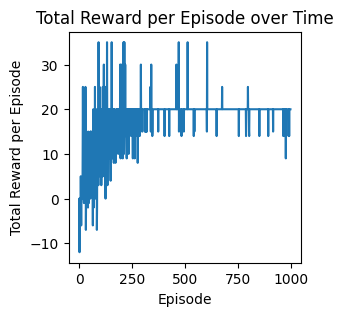

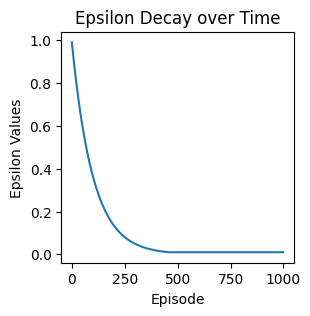

In [76]:
env = LawnmowerGridEnvironment()
base_agent = SarsaAgent(env)
base_total_rewards, base_epsilon_values = base_agent.train_sarsa(num_episodes=1000)
plot_rewards(base_total_rewards)
plot_epsilon_decay(base_epsilon_values)


Evaluation for Hyperparameters: (gamma=0.8, epsilon_decay=0.95, num_episodes=1000)
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 2.35792224e+00  6.47522653e-02  8.67425291e+00  1.56928000e-03]
 [ 1.35248284e-01  1.09088418e+01  5.51770728e-01  1.64344856e+00]
 [ 6.95982269e+00  1.35713987e+01  1.34642041e+00  5.79191618e+00]
 [ 0.00000000e+00 -9.94239282e-01  0.00000000e+00  5.76169014e+00]
 [ 1.99084129e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.33272833e+00  5.38552118e-01  1.36138330e+01  2.20525044e-01]
 [ 1.04667541e+01 -1.15120062e+00 -1.94615447e+00  6.29755167e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.00000000e-01  7.81354008e+00]
 [ 7.11906621e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.34493001e+00 -5.

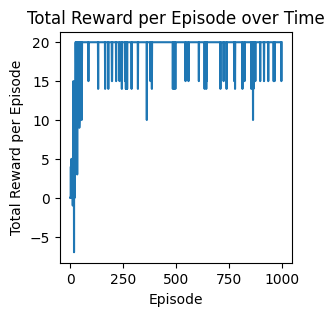

Epsilon Decay over Time


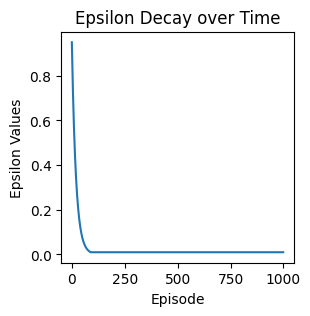


Evaluation for Hyperparameters: (gamma=0.8, epsilon_decay=0.98, num_episodes=1000)
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 2.85821764e+00  1.75174103e-01  8.82769338e+00  1.17402405e+00]
 [ 3.63620472e+00  3.93819292e+00  1.10716447e+01  2.50100133e+00]
 [ 8.26773452e+00  1.38722365e+01  6.20932711e+00  5.66698784e+00]
 [ 8.74499460e-01 -1.89225328e+00  7.93701349e-01  1.00226784e+01]
 [ 1.67507946e+00  5.47200000e-03  4.25681879e-06  2.07567929e-02]
 [ 4.08249887e-01  5.80131089e-01  1.06847394e+01  8.60610803e-04]
 [ 1.10946331e+01 -1.54900630e+00 -3.90009220e-01  5.41885667e+00]
 [ 0.00000000e+00  8.00000000e-02 -6.00000000e-01  9.97058072e+00]
 [ 8.58800421e-04  0.00000000e+00 -2.26447616e-02  0.00000000e+00]
 [ 1.33808305e-01  3.54169156e+00 -1.

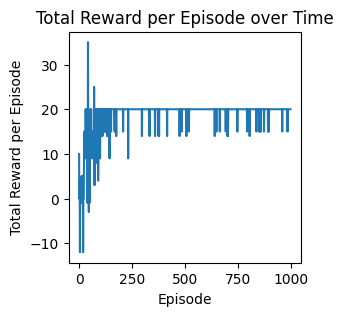

Epsilon Decay over Time


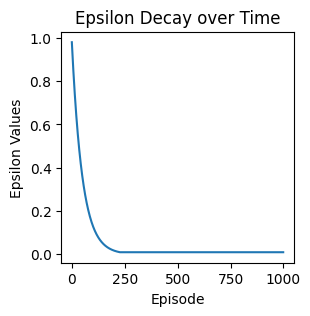


Evaluation for Hyperparameters: (gamma=0.8, epsilon_decay=0.999, num_episodes=1000)
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 3.49735874  5.18984903  3.64128511  3.33785307]
 [ 3.46446618  6.40828401  3.88405211  2.5833798 ]
 [ 4.04497622  7.83935673  0.57969457  2.94435397]
 [-0.3354784  -4.64995867  0.39217825  4.12905121]
 [ 3.26338972  8.07354561  6.42237301  5.14048053]
 [ 3.84896236 11.12432449  6.88313235  4.2578522 ]
 [ 3.9333642  -2.39912138 -3.09805031  7.36386376]
 [ 0.39021398  1.94598955 -4.26712515  7.7112918 ]
 [ 4.31793637 11.79544741  8.52144258  5.75418634]
 [ 7.29866495 17.09710189 -0.60201924  6.28735309]
 [ 7.83869652  1.44184864  1.72599054  4.93359094]
 [-4.36389303  8.64914828  0.10666143 -2.8489905 ]
 [ 4.28248886  9.47236002 1

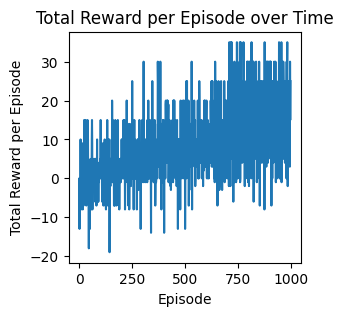

Epsilon Decay over Time


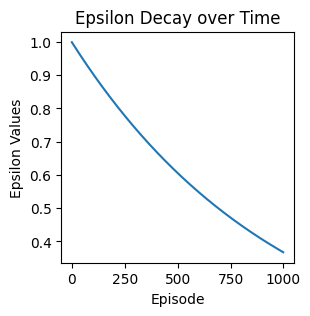


Evaluation for Hyperparameters: (gamma=0.9, epsilon_decay=0.95, num_episodes=1000)
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 3.75746022e+00  2.07742401e+00  1.86439629e+01  3.83504820e+00]
 [ 8.13099424e-01  2.24926327e+01  3.45640823e+00  4.62768264e+00]
 [ 2.72618938e-01  2.19592370e+01  0.00000000e+00  3.65346297e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.84147272e+00]
 [ 3.28050000e-05  0.00000000e+00  1.54018461e+01  0.00000000e+00]
 [ 1.39557666e+01  8.83123026e+00  2.50583084e+01  5.04622639e+00]
 [ 1.16790693e+01 -7.90578629e-01 -4.32007496e+00  2.24356559e+01]
 [ 1.26992610e+00  0.00000000e+00 -6.00000000e-01  0.00000000e+00]
 [ 4.06033846e-02  0.00000000e+00  4.31390560e-02  0.00000000e+00]
 [ 1.74340366e+01  0.00000000e+00  0.

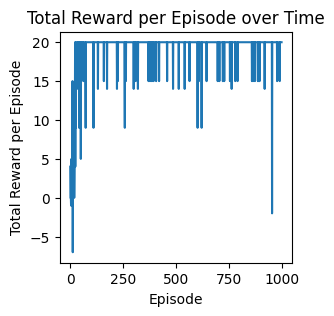

Epsilon Decay over Time


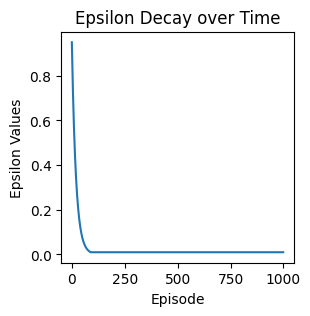


Evaluation for Hyperparameters: (gamma=0.9, epsilon_decay=0.98, num_episodes=1000)
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 5.99676682e+00  9.74899452e-01  2.08385479e+01  3.84303218e+00]
 [ 7.02683753e+00  2.33147081e+01  4.35001341e+00  5.80350201e+00]
 [-2.70732865e-02  1.50993212e+01  2.07706579e-02  5.20027652e-01]
 [-1.85544161e-01 -2.45706000e+00  0.00000000e+00  1.63233294e+00]
 [ 4.68907361e-01  7.69500000e-03  1.74381305e+01  9.93771146e-02]
 [ 1.38357336e+01  7.05693685e+00  2.60597482e+01  9.41494517e+00]
 [ 9.57719104e+00  4.87284903e+00  2.93799760e+00  2.34295135e+01]
 [-8.34494756e-02  0.00000000e+00 -1.82972446e+00  1.64466224e+01]
 [ 0.00000000e+00  1.98900000e-01  0.00000000e+00  1.79010000e-02]
 [ 1.55220837e+01  1.40000000e+00 -1.

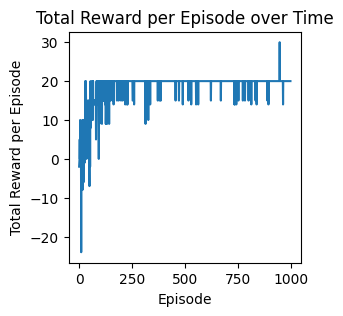

Epsilon Decay over Time


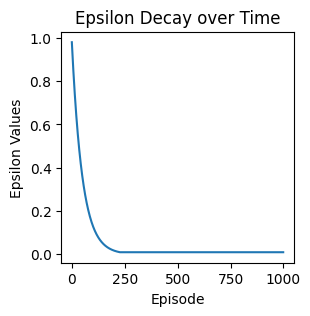


Evaluation for Hyperparameters: (gamma=0.9, epsilon_decay=0.999, num_episodes=1000)
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 8.03396337 10.16614452  8.33773225  7.75820543]
 [ 7.61460441 11.13800237  7.76444386  6.17291263]
 [ 6.22858084 10.3074566   0.65011382  5.29538144]
 [-0.62494921 -4.92708527  0.31883402  4.87889707]
 [ 7.91857506 10.23499456 12.81552925  9.09666543]
 [ 8.10397187 16.01283012 11.85799502  9.26081039]
 [ 6.93569878  1.26298401  0.24425107 12.41591631]
 [ 0.84572913  4.95528242 -3.5246949  11.89543939]
 [ 6.54757262 17.07978141 10.15418506  7.0399898 ]
 [12.15456311 23.57397919  2.81793442  9.1811424 ]
 [11.62991164  4.80677781  5.77214321 10.24087412]
 [-1.71535454  9.72187161  2.29778847 -2.75704632]
 [ 7.35338468 14.23788704 2

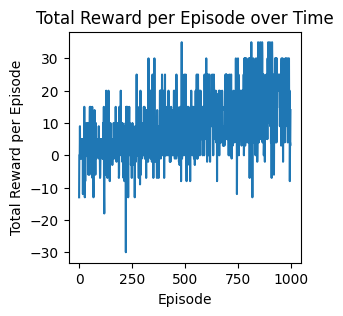

Epsilon Decay over Time


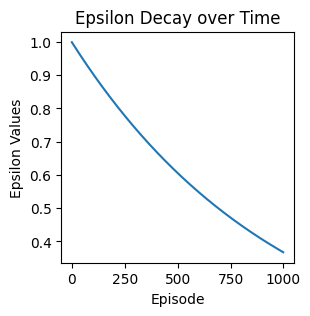


Evaluation for Hyperparameters: (gamma=0.95, epsilon_decay=0.95, num_episodes=1000)
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 1.70063151e+01  1.89506744e-02  4.02332459e+01  7.88892406e+00]
 [ 2.01434040e+01  4.83784239e+00  4.51531731e+01  9.79855410e+00]
 [ 3.31701613e+01  4.75592315e+01  2.11698862e+01  2.46785916e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.59810429e+01]
 [ 4.25771987e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.38630302e-01  0.00000000e+00  2.92769706e+01  0.00000000e+00]
 [ 4.38734856e+01  5.31502262e+00  1.04059277e-01  7.81769944e+00]
 [ 1.11923238e-01  0.00000000e+00 -6.00000000e-01  1.86021110e+01]
 [ 6.97696382e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e-01  0

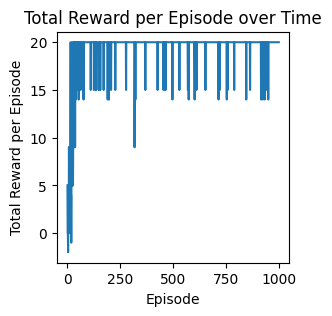

Epsilon Decay over Time


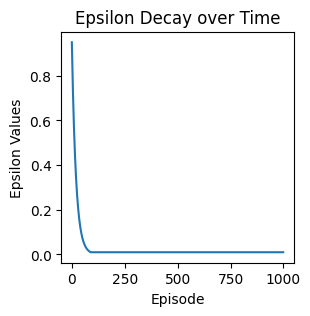


Evaluation for Hyperparameters: (gamma=0.95, epsilon_decay=0.98, num_episodes=1000)
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[ 1.86217307e+01  1.52329748e+00  4.09877594e+01  9.32427327e+00]
 [ 4.11047606e+00  3.08423937e+00  4.35831752e+01  7.92650772e+00]
 [ 2.33325444e+01  4.67786185e+01  1.40321005e+01  2.49574156e+01]
 [-1.81360911e-01 -1.94907143e+00 -1.03787500e-01  3.00217623e+01]
 [ 4.30024254e-02  0.00000000e+00  8.44572587e+00  6.93987161e-02]
 [ 3.20592267e-01  1.41122500e-01  3.19974947e+01  2.71648432e-01]
 [ 4.42264485e+01  1.16328727e+01  1.07357355e+01  1.08409848e+01]
 [-1.72292865e-02  0.00000000e+00  2.54442468e-01  3.09540819e+01]
 [ 6.25969751e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.48372500e+00  0

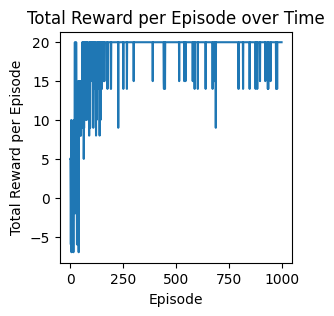

Epsilon Decay over Time


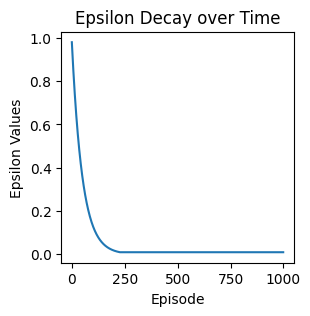


Evaluation for Hyperparameters: (gamma=0.95, epsilon_decay=0.999, num_episodes=1000)
Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table:
[[13.51210632 17.04375971 13.34928104 11.51633915]
 [12.49456215 17.52235237 12.34076848 11.33128024]
 [10.35919833 17.62717896  2.52400709  8.91335633]
 [ 1.06788687 -3.33702933  1.14294125  7.3490621 ]
 [12.72335511 12.43780227 22.87826968 11.80419291]
 [14.00059144 28.23992971 17.33160441 14.09635901]
 [13.13033054  6.69874093  2.70931738 18.78681866]
 [-0.2951629   0.62668399 -4.14068678 14.55471862]
 [ 5.85448149 23.78823194  7.01113431  5.64589105]
 [15.37166977 33.43920895  5.87397642 14.34249762]
 [18.4939577   9.40920487  4.48982464  6.34218431]
 [-3.70337274  9.35389181  3.33727206 -1.35304978]
 [ 7.86826232  9.55086639 

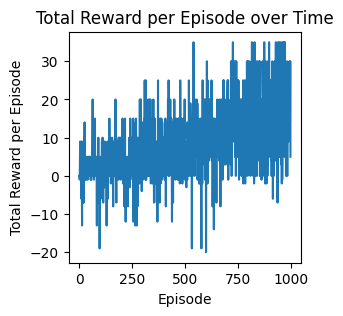

Epsilon Decay over Time


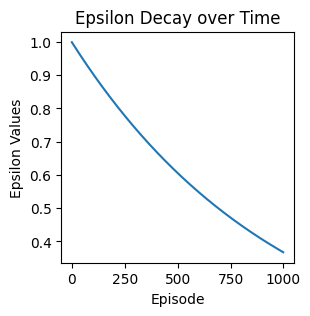

In [85]:
def hyperparameter_tuning(gamma_values, epsilon_decay_rates, num_episodes):
    result = []
    for gamma in gamma_values:
        for epsilon_decay in epsilon_decay_rates:
            print(f'\nEvaluation for Hyperparameters: (gamma={gamma}, epsilon_decay={epsilon_decay}, num_episodes={num_episodes})')
            env = LawnmowerGridEnvironment()
            agent = SarsaAgent(env, gamma=gamma, epsilon_decay=epsilon_decay)
            total_rewards, epsilon_values = agent.train_sarsa(num_episodes=num_episodes)
            result.append((gamma, epsilon_decay, num_episodes, total_rewards, epsilon_values))
            print('Rewards per Episode')
            plot_rewards(total_rewards)
            print('Epsilon Decay over Time')
            plot_epsilon_decay(epsilon_values)
    return result

gamma_values = [0.8, 0.9, 0.95]
epsilon_decay_rates = [0.95, 0.98, 0.999]
num_episodes = 1000
results = hyperparameter_tuning(gamma_values, epsilon_decay_rates, num_episodes)

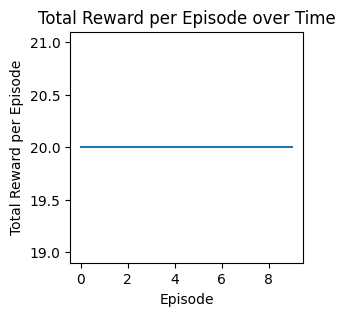

In [83]:
def greedy_policy_sarsa(agent, number_episodes):
    total_rewards = []
    for episode in range(number_episodes):
        state = agent.env.reset()
        episode_reward = 0
        while True:
            action = np.argmax(agent.Q[state, :])
            next_state, reward, terminated, _ = agent.env.step(action)
            next_state = agent.env.state_to_index(next_state)
            episode_reward += reward
            state = next_state
            if terminated:
                break
        total_rewards.append(episode_reward)
    return total_rewards

number_episodes = 10
test_rewards = greedy_policy_sarsa(base_agent, number_episodes)  # base_agent is sarsa agent here
plot_rewards(test_rewards)  # plotting total reward per episode

**PART-III: Double Q-Learning**

In [78]:
class DoubleQAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01):
        self.env = env
        self.action_space_size = env.action_space.n
        self.state_space_size = env.state_space.n
        self.Q1 = np.zeros((self.state_space_size, self.action_space_size))
        self.Q2 = np.zeros((self.state_space_size, self.action_space_size))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space_size)
        else:
            Q = self.Q1[state, :] + self.Q2[state, :]
            return np.argmax(Q)
            
    def update_Q_tables(self, state, action, reward, next_state):
        state = int(state)
        next_state = int(next_state)
        if np.random.rand() < 0.5:
            max_next_action = np.argmax(self.Q1[next_state, :])
            target = reward + self.gamma * self.Q2[next_state, max_next_action]
            self.Q1[state, action] += self.alpha * (target - self.Q1[state, action])
        else:
            max_next_action = np.argmax(self.Q2[next_state, :])
            target = reward + self.gamma * self.Q1[next_state, max_next_action]
            self.Q2[state, action] += self.alpha * (target - self.Q2[state, action])
            
    def decay_epsilon(self):
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
        
    def train_doubleQ(agent, num_episodes):
        total_rewards = []
        epsilon_values = []
        for episode in range(num_episodes):
            if episode == 0:
                print('Initial Q1-table:')
                print(np.round(agent.Q1, decimals=2))
                print('Initial Q2-table:')
                print(np.round(agent.Q2, decimals=2))
            state = agent.env.reset()
            episode_reward = 0
            while True:
                action = agent.choose_action(state)
                next_state, reward, terminated, info = agent.env.step(action)
                next_state = agent.env.state_to_index(next_state)
                agent.update_Q_tables(state, action, reward, next_state)
                episode_reward += reward
                state = next_state
                if terminated:
                    break
            agent.decay_epsilon()
            total_rewards.append(episode_reward)
            epsilon_values.append(agent.epsilon)
        print('\nTrained Q1-table:')
        print(np.round(agent.Q1, decimals=2))
        print('\nTrained Q2-table:')
        print(np.round(agent.Q2, decimals=2))
        return total_rewards, epsilon_values

def plot_rewards(total_rewards):
    plt.figure(figsize=(3,3))
    plt.plot(total_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward per Episode')
    plt.title('Total Reward per Episode over Time')
    plt.show()

def plot_epsilon_decay(epsilon_values):
    plt.figure(figsize=(3,3))
    plt.plot(epsilon_values)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Values')
    plt.title('Epsilon Decay over Time')
    plt.show()

Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[ 7.6100e+00  4.7100e+00  2.0033e+02  2.9440e+01]
 [ 2.2170e+01  1.5690e+01  2.0499e+02  1.4340e+01]
 [ 7.5270e+01  2.0895e+02  1.6640e+01  6.3730e+01]
 [ 8.6000e-01 -1.0200e+00  1.0500e+00  5.5370e+01]
 [ 1.3000e-01  0.0000e+00  1.8280e+01  9.0000e-02]
 [ 3.1000e+00  8.4000e-01  8.3680e+01  8.0000e-02]
 [ 2.0618e+02  1.4160e+01  1.2190e+01  3.0760e+01]
 [ 8.8000e-01 -4.0000e-02 -1.3000e-01  6.4460e+01]
 [ 0.0000e+00  0.0000e+00  1.6000e-01  0.0000e+00]
 [ 4

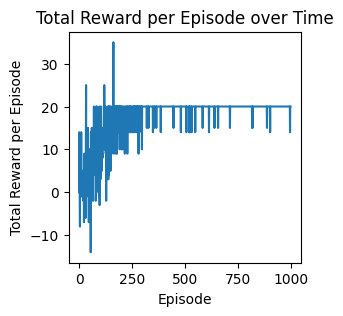

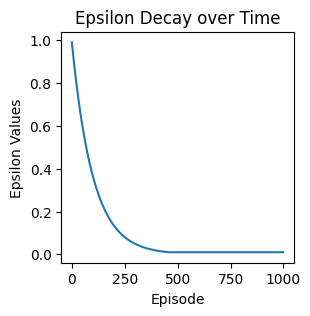

In [79]:
env = LawnmowerGridEnvironment()
base_agent_doubleq = DoubleQAgent(env)
base_total_rewards1, base_epsilon_values1 = base_agent_doubleq.train_doubleQ(num_episodes=1000)
plot_rewards(base_total_rewards1)
plot_epsilon_decay(base_epsilon_values1)


Evaluation for Hyperparameters: (gamma=0.8, epsilon_decay=0.95, num_episodes=1000)
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[ 1.350e+00  0.000e+00  8.890e+00  1.000e-02]
 [ 0.000e+00  1.320e+00  1.111e+01  1.930e+00]
 [ 6.900e+00  1.389e+01  8.600e-01  1.880e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  6.090e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  6.240e+00  0.000e+00]
 [ 1.111e+01 -1.880e+00 -1.560e+00  1.250e+00]
 [ 1.020e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 

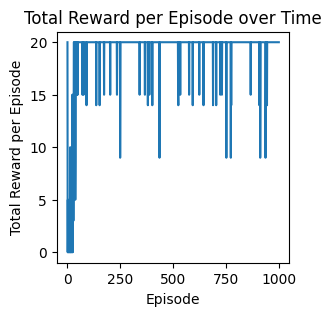

Epsilon Decay over Time


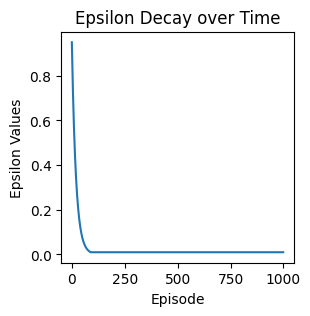


Evaluation for Hyperparameters: (gamma=0.8, epsilon_decay=0.98, num_episodes=1000)
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[ 1.13  0.78  8.89  1.14]
 [ 1.9  11.11  1.18  0.48]
 [ 0.14  8.49  0.    0.14]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    8.19  0.  ]
 [ 4.44  2.43 13.89  2.08]
 [ 3.49 -1.66 -1.35 11.11]
 [ 0.    0.   -0.6   9.27]
 [ 0.07  0.    0.    0.  ]
 [ 7.79  0.95 -1.02  0.  ]
 [ 8.64  0.    0.    0.  ]
 [-0.6   1.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.14  0.    0.    0.  ]
 

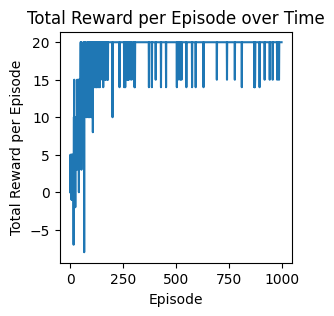

Epsilon Decay over Time


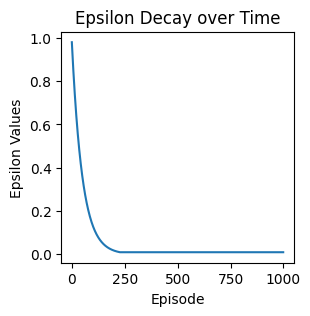


Evaluation for Hyperparameters: (gamma=0.8, epsilon_decay=0.999, num_episodes=1000)
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[ 7.64 11.62  8.7   7.35]
 [ 6.51 10.26 11.25  6.26]
 [10.3  14.68  5.2   7.72]
 [ 3.42 -0.06  2.44  8.61]
 [ 7.46  6.99 14.86 10.23]
 [ 8.7  19.09 14.13 10.39]
 [10.85  4.35  4.37 13.82]
 [ 2.62  4.11  0.74 13.76]
 [10.23  9.23  8.83  4.44]
 [11.3  24.31  3.07  5.55]
 [13.62  2.18  4.49  7.26]
 [-0.41  7.94  1.99 -0.83]
 [ 3.29  4.21 20.45  3.26]
 [16.94 24.42  4.76 12.63]


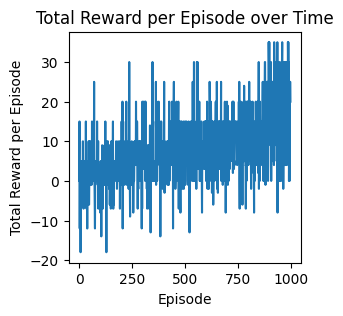

Epsilon Decay over Time


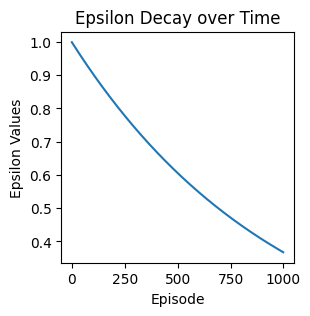


Evaluation for Hyperparameters: (gamma=0.9, epsilon_decay=0.95, num_episodes=1000)
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[ 0.    0.43 21.32  5.19]
 [ 4.05  0.   23.68  1.97]
 [ 9.64 26.32  0.    5.07]
 [ 0.    0.    0.    0.  ]
 [ 3.64  0.    0.    0.  ]
 [ 6.36  0.    0.    0.  ]
 [23.68 -1.6  -0.6   0.56]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [10.37  0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 

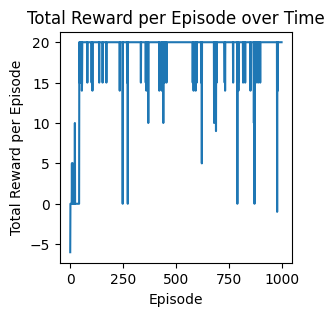

Epsilon Decay over Time


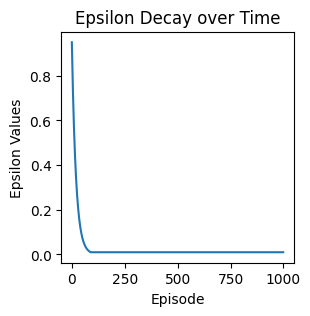


Evaluation for Hyperparameters: (gamma=0.9, epsilon_decay=0.98, num_episodes=1000)
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[ 6.32 21.32  2.53  2.7 ]
 [ 0.51 16.14  0.34  0.61]
 [ 0.09 10.72  0.03  0.  ]
 [ 0.   -0.6   0.    0.14]
 [ 2.36  0.32 23.68  6.4 ]
 [ 6.57  2.08 26.32 10.35]
 [ 2.33  0.8  -1.19 23.68]
 [ 0.    0.17 -1.24 15.61]
 [ 4.83  0.    0.    0.  ]
 [ 0.86  7.06 -0.6   0.  ]
 [13.72  0.    0.    0.  ]
 [-0.6   2.71  0.09  0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.76 11.75  0.    0.  ]
 

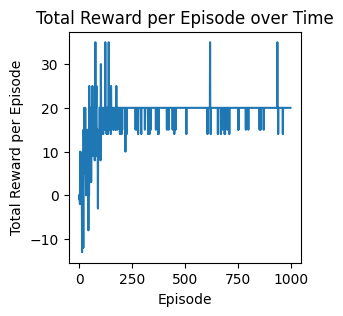

Epsilon Decay over Time


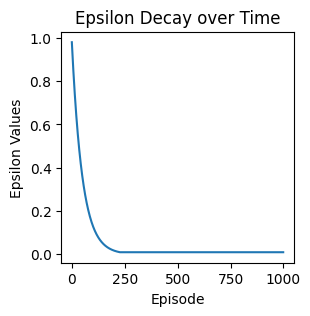


Evaluation for Hyperparameters: (gamma=0.9, epsilon_decay=0.999, num_episodes=1000)
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[19.28 27.93 20.97 19.97]
 [17.69 26.81 18.02 14.8 ]
 [ 8.23 25.28  5.23 13.01]
 [ 2.31  1.71  1.79 13.05]
 [18.78 15.93 31.53 22.87]
 [21.02 36.8  26.66 22.9 ]
 [20.88 13.96 13.69 27.7 ]
 [ 4.79  1.61  2.95 25.07]
 [24.11 13.23 16.24  9.14]
 [21.39 41.65 11.97 15.75]
 [25.59  5.01  3.62 15.69]
 [-0.16  5.7   0.39 -0.72]
 [ 6.13  9.14 37.01  6.22]
 [29.6  42.99 15.47 21.04]


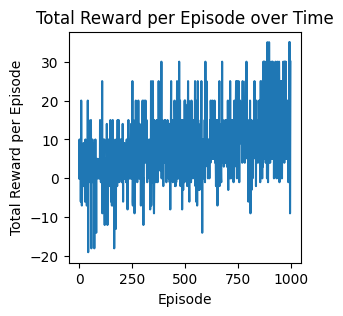

Epsilon Decay over Time


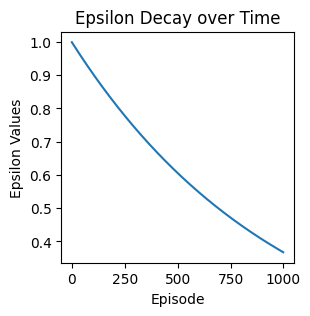


Evaluation for Hyperparameters: (gamma=0.95, epsilon_decay=0.95, num_episodes=1000)
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[ 4.14  0.   46.28  4.13]
 [ 5.   48.71  3.91  4.6 ]
 [ 0.   27.69  0.    0.09]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.   19.08  0.1 ]
 [23.8   1.22 51.28  8.89]
 [ 5.75 -1.46 -1.5  48.72]
 [ 0.    0.    0.   15.78]
 [ 0.    0.    0.    0.  ]
 [ 0.    4.13  0.    0.  ]
 [17.8   0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 2.    0.    0.    0.  ]


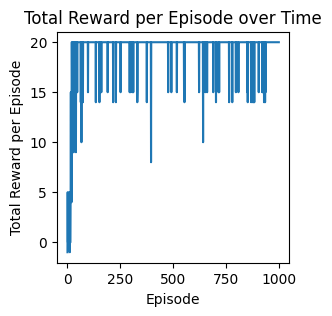

Epsilon Decay over Time


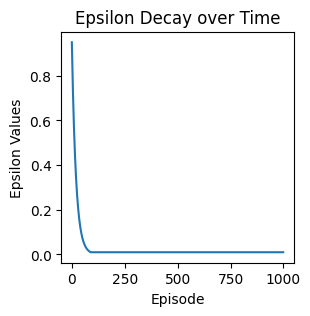


Evaluation for Hyperparameters: (gamma=0.95, epsilon_decay=0.98, num_episodes=1000)
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[ 3.100e+00  1.950e+00  4.628e+01  8.440e+00]
 [ 5.710e+00  4.990e+00  4.871e+01  5.870e+00]
 [ 3.189e+01  5.128e+01  1.410e+00  2.262e+01]
 [ 7.000e-02 -1.660e+00  0.000e+00  1.324e+01]
 [ 4.000e-02  0.000e+00  5.800e+00  0.000e+00]
 [ 5.200e-01  0.000e+00  3.688e+01  1.300e-01]
 [ 4.871e+01  2.520e+00  1.300e+00  1.170e+01]
 [ 7.000e-02  1.020e+00 -6.000e-01  2.197e+01]
 [

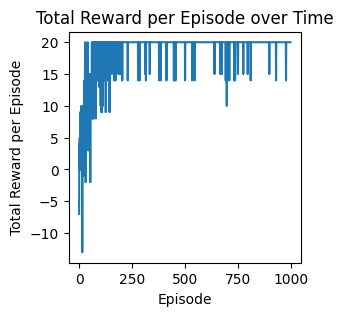

Epsilon Decay over Time


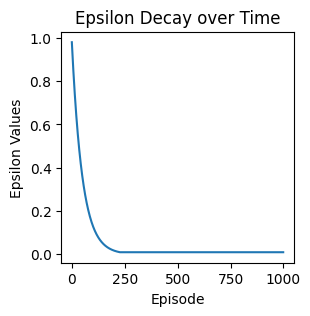


Evaluation for Hyperparameters: (gamma=0.95, epsilon_decay=0.999, num_episodes=1000)
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1-table:
[[33.71 39.34 33.17 34.95]
 [24.31 41.52 32.29 32.52]
 [20.08 42.45  5.36 18.44]
 [ 1.38  0.65  3.14 20.88]
 [35.22 33.38 43.28 33.23]
 [35.67 37.18 44.46 37.57]
 [35.42 28.86 27.03 43.42]
 [ 8.83  3.98  8.81 38.63]
 [35.76 10.8  23.11 10.77]
 [25.   47.36 15.26 20.39]
 [38.88  4.86  4.17 16.87]
 [ 1.46  6.86  0.81 -1.2 ]
 [ 8.17  4.84 29.8   8.91]
 [24.74 47.96  6.01 14.94]

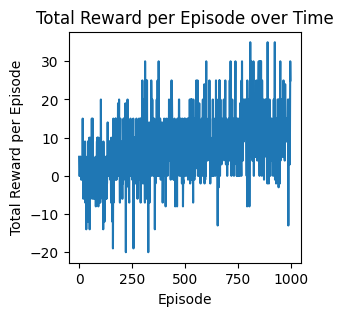

Epsilon Decay over Time


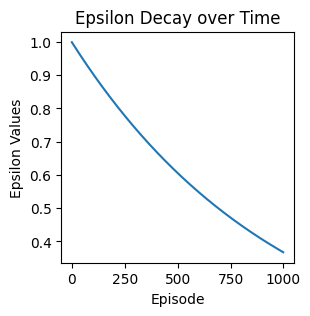

In [80]:
def hyperparameter_tuning(gamma_values, epsilon_decay_rates, num_episodes):
    result = []
    for gamma in gamma_values:
        for epsilon_decay in epsilon_decay_rates:
            print(f'\nEvaluation for Hyperparameters: (gamma={gamma}, epsilon_decay={epsilon_decay}, num_episodes={num_episodes})')
            env = LawnmowerGridEnvironment()
            agent = DoubleQAgent(env, gamma=gamma, epsilon_decay=epsilon_decay)
            total_rewards, epsilon_values = agent.train_doubleQ(num_episodes=num_episodes)
            result.append((gamma, epsilon_decay, num_episodes, total_rewards, epsilon_values))
            print('Rewards per Episode')
            plot_rewards(total_rewards)
            print('Epsilon Decay over Time')
            plot_epsilon_decay(epsilon_values)
    return result

gamma_values = [0.8, 0.9, 0.95]
epsilon_decay_rates = [0.95, 0.98, 0.999]
num_episodes = 1000
results = hyperparameter_tuning(gamma_values, epsilon_decay_rates, num_episodes)

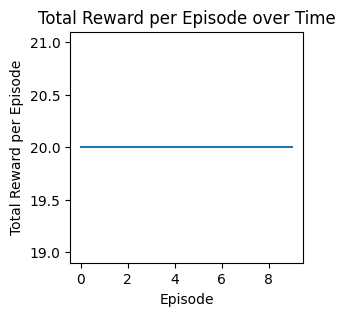

In [81]:
def greedy_policy_doubleq(agent, number_episodes):
    total_rewards = []
    for episode in range(number_episodes):
        state = agent.env.reset()
        episode_reward = 0
        while True:
            action = np.argmax(agent.Q1[state, :] + agent.Q2[state, :])
            next_state, reward, terminated, _ = agent.env.step(action)
            next_state = agent.env.state_to_index(next_state)
            episode_reward += reward
            state = next_state
            if terminated:
                break
        total_rewards.append(episode_reward)
    return total_rewards

number_episodes = 10
test_rewards = greedy_policy_doubleq(base_agent_doubleq, number_episodes)  # base_agent is double Q agent here
plot_rewards(test_rewards)  # plotting total reward per episode

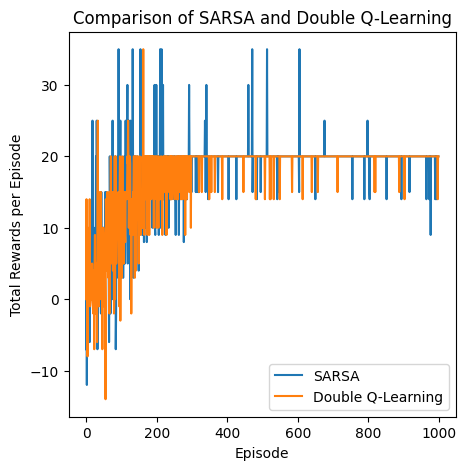

In [84]:
# comparing the results of sarsa and double q
plt.figure(figsize=(5,5))
plt.plot(base_total_rewards, label='SARSA')
plt.plot(base_total_rewards1, label='Double Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Total Rewards per Episode')
plt.title('Comparison of SARSA and Double Q-Learning')
plt.legend()
plt.show()

In [ ]:
'''
References:
1. https://ubuffalo-my.sharepoint.com/personal/avereshc_buffalo_edu/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Favereshc%5Fbuffalo%5Fedu%2FDocuments%2F2023%5FFall%5FML%2F%5Fpublic%2FCourse%20Materials%2FRL%20Environment%20Visualization%20by%20Nitin%20Kulkarni&ga=1
2. https://ubuffalo-my.sharepoint.com/personal/avereshc_buffalo_edu/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Favereshc%5Fbuffalo%5Fedu%2FDocuments%2F2023%5FFall%5FAI%2F%5Fpublic%2FCourse%20Materials%2FRL%20Environment%20Visualization%20by%20Nitin%20Kulkarni&ga=1
'''